# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [24]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [25]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** 
1. The more RM there is, the more MEDV and vice versa. That is what my intuition tells me in regard to houses prices.
2. The more LSTAT there is, the less MEDV and vice versa. lower class or poor people won't be able to afford expensive houses. 
3. The more PTRATIO there is, the less MEDV and vice versa. Usually in more poor neighborhoods, families have more kids. Thus leading to more students which means these families will be looking for lower prices for their homes. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [26]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [27]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** This model captured the variation of the target variable with 92.3%. The reason for that is because R2 score is 0.923 which is close to 1 (the score that means that the model captured the variation perfectly). 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [28]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size = 0.80, random_state = 42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** We are building a model that will predict prices of futures houses. We need to be able to assess the performance of our model. We can't throw future values on the model before making sure that it has a low error on future values. Therefore, we need to test our model on real data which is part of the data we have collected. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

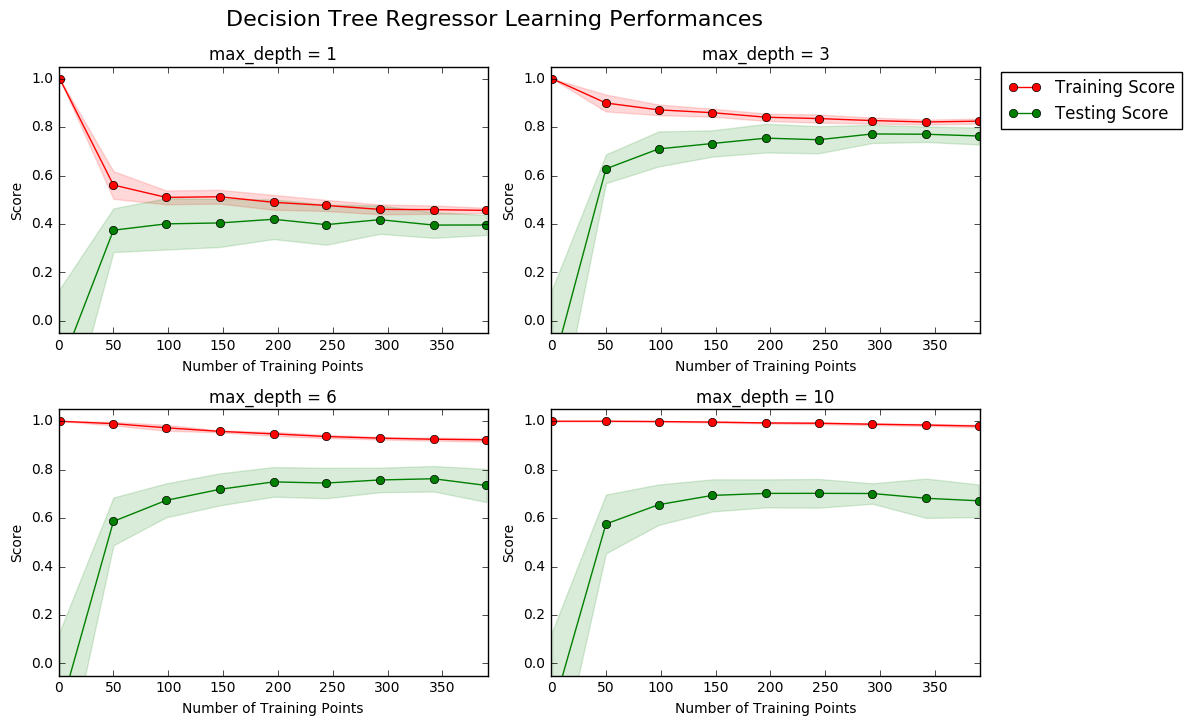

In [29]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
1. Graph number one with max_depth of 1 shows that both the training score and testing score converge to the same score. This is a low score of about 0.42 which means that the model is not complex enough (high bias). Adding more points in this case will not benefit the model since the model doesn't represent the underlying relationship. 
2. For graph 2 of max_depth of 3, it shows that both the training and testing score converge to a high score of 0.8. This means that this model doesn't suffer from high bias and it doesn't suffer from high variance since it performs well on the testing score and there is no gap in between the two scores. Adding more data points will help the model further but it won't be necessary.
3. Graph 3 with max_depth of 6 displays a perfect score for the training set and a lower score for the testing set with a gap in between. This model suffers from high variance and adding more data points is definitely going to help the model to converge to a score.
4. Graph 4 with max_depth of 10. This graph has the highest variance out of all the other graphs since training set scores perfectly and it does seem to be converging to a lower score in a very slow pace. The testing set is converging as well but with a slow pace as well. There is a gap in between and adding more data points surely going to help but we will need to add lots of them for these two curves to be closer to each other.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

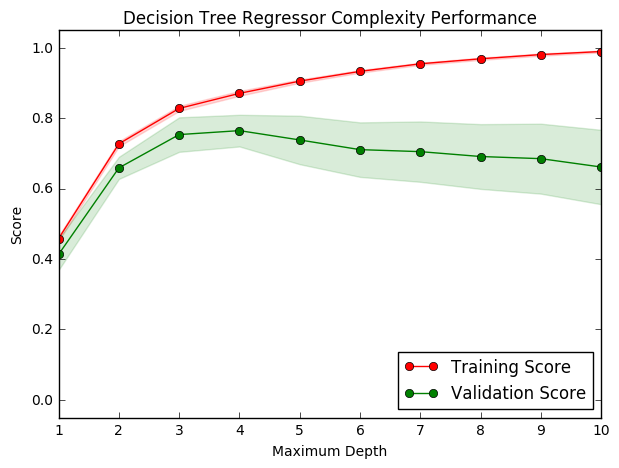

In [31]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** With a maximum depth of 1, the model suffers from high bias since the training score is low which means that the model can't fit the training set correctly. When the maximum depth is 10 then the model suffers from high variance which is clear because of the gap in between the training and the testing scores where it scores perfectly on the training set while it doesn't score as good in the testing set. 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** I think that a maximum depth of 3 will best generalize very well. The reason for that is a max depth of 3 seems to capture a high score for the training set while also scoring high on the testing set. This sweet spot doesn't suffer from either a high bias or a high variance.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The grid search technique is used to tune parameters to find out which combination of parameters gives the best performance for the model. It can be used by passing parameters to a classifier to try them out and return back the best one.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** K-Fold cross-validation training technique is when you divide the datasets into k groups, then you use k-1 groups as your training set and one of these groups as the test set. You do this k times while shuffling them around and then you take the average of your test results from the k cross validation runs. The benefit you get for grid search is that while you are tuning your parameters, you would want to try all the different combinations of training and testing sets to get the best training and testing results. This is why when doing grid search, we need to test those models with these parameters on a testing set to make sure we are on the right path. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [32]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { 'max_depth': [x for x in range(1, 11)]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [33]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** Maximum depth for the optimal model is 4. My guess was 3. I'm not surprised but still wondering while did it lean to 4 rather than a max of 3. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [39]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

#### ----------- Code added by me and It's not part of this cell ------- ####
# This code I will use to find out statisitcs for the other features
# Get Certain features out of the dataset'RM', 'LSTAT', 'PTRATIO'
rm = data['RM']
nei_pov = data['LSTAT']
student_teacher_ratio = data['PTRATIO']


# Minimum value for each feature
min_rm = np.min(rm)
min_nei_pov = np.min(nei_pov)
min_stud_tea_rat = np.min(student_teacher_ratio)

# max value for each feature
max_rm = np.max(rm)
max_nei_pov = np.max(nei_pov)
max_stud_tea_rat = np.max(student_teacher_ratio)

# Mean value for each feature
mean_rm = np.mean(rm)
mean_nei_pov = np.mean(nei_pov)
mean_stud_tea_rat = np.mean(student_teacher_ratio)

# Median value for each feature
median_rm = np.median(rm)
median_nei_pov = np.median(nei_pov)
median_stud_tea_rat = np.median(student_teacher_ratio)

# std for each feature
std_rm = np.std(rm)
std_nei_pov = np.std(nei_pov)
std_stud_tea_rat = np.std(student_teacher_ratio)

print ""
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

print ""
print "These are the stats for number of rooms"
print "Minimum number of rooms: {:,.2f}".format(min_rm)
print "Maximum number of rooms: {:,.2f}".format(max_rm)
print "Mean number of rooms: {:,.2f}".format(mean_rm)
print "Median number of rooms {:,.2f}".format(median_rm)
print "Standard deviation of number of rooms: {:,.2f}".format(std_rm)

print ""
print "These are the stats for neighboorhood poverty level"
print "Minimum neighboorhood poverty level: {:,.2f}%".format(min_nei_pov)
print "Maximum neighboorhood poverty level: {:,.2f}%".format(max_nei_pov)
print "Mean neighboorhood poverty level: {:,.2f}%".format(mean_nei_pov)
print "Median neighboorhood poverty level {:,.2f}%".format(median_nei_pov)
print "Standard deviation of neighboorhood poverty level: {:,.2f}%".format(std_nei_pov)

print ""
print "These are the stats for students to teachers ratio"
print "Minimum students to teachers ratio: {:,.2f}".format(min_stud_tea_rat)
print "Maximum students to teachers ratio: {:,.2f}".format(max_stud_tea_rat)
print "Mean students to teachers ratio: {:,.2f}".format(mean_stud_tea_rat)
print "Median students to teachers ratio {:,.2f}".format(median_stud_tea_rat)
print "Standard deviation of students to teachers ratio: {:,.2f}".format(std_stud_tea_rat)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13

These are the stats for number of rooms
Minimum number of rooms: 3.56
Maximum number of rooms: 8.40
Mean number of rooms: 6.24
Median number of rooms 6.18
Standard deviation of number of rooms: 0.64

These are the stats for neighboorhood poverty level
Minimum neighboorhood poverty level: 1.98%
Maximum neighboorhood poverty level: 37.97%
Mean neighboorhood poverty level: 12.94%
Median neighboorhood poverty level 11.69%
Standard deviation of neighboorhood poverty level: 7.07%

These are the stats for students to teachers ratio
Minimum students to teachers ratio: 12.60
Maximum students to teachers ratio: 22.00
Mean students to teachers

**Answer: ** Prices recommended for each client to sell his/her home at: 
1. Predicted selling price for Client 1's home: ``$403,025.00``
2. Predicted selling price for Client 2's home: ``$237,478.72``
3. Predicted selling price for Client 3's home: ``$931,636.36``

Looking at the statistics we calculated at the beginning as well as those calculated for the other features, these prices seems reasonable given the dataset we have. 

1. Client one has 5 rooms with 17% neighborhood poverty level and 15 to 1 students to teachers’ ratio. As we can see from the stats, this is more than the mean in the case of neighborhood poverty and less than that in the students to teachers’ ratio. It's also less than the number of rooms which means that we can say that the price should be less than the mean price of houses which is the case with our predications. 

2. Client two has 4 rooms with 32% neighborhood poverty level and 22 to 1 students to teachers’ ratio. As we can see from the stats, this is closer to the max in the case of neighborhood poverty and exactly the max in the students to teachers’ ratio. It's also closer to the min number of rooms which means that we can say that the price should be in the lower end of prices closer to the minimum price. This is the case while still there is a bit of difference between the minimum price and this price, it's still in the lower end. 

2. Client three has 8 rooms with 3% neighborhood poverty level and 12 to 1 students to teachers’ ratio. As we can see from the stats, this is closer to the min in the case of neighborhood poverty and even less than the min in the students to teachers’ ratio. It's also closer to the max number of rooms which means that we can say that the price should be near the maximum price of houses. This is definitely the case in here with quite the difference of around $70,000.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [40]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: ** I don't think that the constructed model should be used in a real-world setting for a number of reasons:

1. I don't think this data is good enough to make predication today given how real estate changes over time and how some features used for this model can be totally different today. For example, neighborhood poverty level will change depending on changes that happens to the city. More rich people can start to move into a somewhat middle class neighborhood which will bring prices up as well as demand more prestigious schools to open up.

2. While I felt that the features used in here were great in generally predicting the prices for houses in an area, I think they don't hold true all the time. Take for example a neighborhood that have a rich and poor sides to it. While this might not be common, there can be areas where the same neighborhood has vastly different houses in terms of prices. I think features that concern the houses themselves should be collected if possible. Things like material used to build the house, area of the house since a house can have many rooms but they are really small which means that the metric of how many rooms a house have don't hold true as a gauge of its price all the time. 

3. I think the model lack consistency. As we have seen, using different splits of train and test sets, will give a huge difference in prices predicated for houses. When I say huge, I mean about 15% - 20% difference in between different fits. This shows that the data we have might not be enough in terms of the different targets and hence when we split, the model might favor certain results over others depending on what we get in the training set.

4. I don't think this will apply to a rural city at all. The infrastructure of a rural city is just vastly different. We have areas with much more space in between different houses hence the student to teacher ration might not a good prediction to prices. Neighborhood in rural areas will be a mix of rich and poor people.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.